In [12]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

[I 12:04:43.524 NotebookApp] Writing notebook server cookie secret to /home/jupyter-mouguntu/.local/share/jupyter/runtime/notebook_cookie_secret
[I 12:04:43.676 NotebookApp] [jupyter_nbextensions_configurator] enabled 0.4.0
[I 12:04:43.699 NotebookApp] JupyterLab extension loaded from /opt/tljh/user/lib/python3.6/site-packages/jupyterlab
[I 12:04:43.700 NotebookApp] JupyterLab application directory is /opt/tljh/user/share/jupyter/lab
[I 12:04:43.717 NotebookApp] nteract extension loaded from /opt/tljh/user/lib/python3.6/site-packages/nteract_on_jupyter
[I 12:04:43.718 NotebookApp] Serving notebooks from local directory: /home/jupyter-mouguntu
[I 12:04:43.718 NotebookApp] The Jupyter Notebook is running at:
[I 12:04:43.718 NotebookApp] http://localhost:8888/?token=205a35cd821f1cb7b3485af4a12c4a1aa1b9225de456effe
[I 12:04:43.718 NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[C 12:04:43.719 NotebookApp] 
    
    Copy/paste this URL

In [1]:
'''
import sys
!{sys.executable} -m pip install --user pandas
!{sys.executable} -m pip install --user sklearn
!{sys.executable} -m pip install --user pixiedust
!{sys.executable} -m pip install --user pixiegateway

# from pixiedust.display.app import *

# @PixieApp
# class ClinicianReferralBot:
#     @route()
#     def default(self):         
#         return """
#             <h1>Hello World</h1>
#         """
'''
import pandas as pd
rows = pd.read_csv('v4.csv', skip_blank_lines=True, dtype={'postauthor':str, 'postcontent':str, 'commauth': str, 'commcont':str})
print(rows.shape)
rows = rows.dropna()
print(rows.shape)
rows.head()

#a = ClinicianReferralBot()
#a.run(runInDialog='false')

(8606, 5)
(6032, 5)


,postauthor,postcontent,length,commauth,commcont
0,Rakesh.Biswas,"Dr MpSingh, Dr Swagatawhat would you suggest f...",11,boudhayan.dm,your valuable inputs sir
1,Rakesh.Biswas,"Dr MpSingh, Dr Swagatawhat would you suggest f...",11,durga.prasan,Sorry
2,Rakesh.Biswas,"Dr MpSingh, Dr Swagatawhat would you suggest f...",11,durga.prasan,Ideally the rectal polyp should have been snar...
3,Rakesh.Biswas,"Dr MpSingh, Dr Swagatawhat would you suggest f...",11,durga.prasan,My suggestion is that all cancers should be de...
4,Rakesh.Biswas,"Dr MpSingh, Dr Swagatawhat would you suggest f...",11,swagata.brahmachari,Ya surely .As correctly pointed out by Durga P...


In [2]:
commauth_unique = rows['commauth'].unique()
len(commauth_unique)

360

In [3]:
rows.dtypes

postauthor     object
postcontent    object
length          int64
commauth       object
commcont       object
dtype: object

In [4]:
count = 0
df = pd.DataFrame(columns=['label', 'text'])
for index, row in rows.iterrows():
    if row[4] == None:
        print('Found None in 4')
    if row[1] == None:
        print('Found None in 1')
    if len(row[4]) > len(row[1]):
        count +=1
        row[1] = row[4]
    df.loc[index] = [row[3],row[1]]
print('Finished processing... replaced ', count, ' rows')
print(df.shape)
df['label']= df['label'].astype(str)
df['text']= df['text'].astype(str)
df.head()

Finished processing... replaced  1698  rows
(6032, 2)


,label,text
0,boudhayan.dm,"Dr MpSingh, Dr Swagatawhat would you suggest f..."
1,durga.prasan,"Dr MpSingh, Dr Swagatawhat would you suggest f..."
2,durga.prasan,Ideally the rectal polyp should have been snar...
3,durga.prasan,My suggestion is that all cancers should be de...
4,swagata.brahmachari,Ya surely .As correctly pointed out by Durga P...


In [5]:
df = df.append([df]*3,ignore_index=True)
df.to_csv('/home/jupyter-mouguntu/texts.csv',index=False)

In [6]:
!pip install fastai --user

In [7]:
#!pip install fastai
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality

# Language model data
data_lm = TextLMDataBunch.from_csv('/home/jupyter-mouguntu/','texts.csv')
# Classifier model data
data_clas = TextClasDataBunch.from_csv('/home/jupyter-mouguntu/','texts.csv', vocab=data_lm.train_ds.vocab, bs=16)

In [8]:
moms = (0.8,0.7)
data_clas.show_batch()

text,target
"xxbos a pregnant lady at 37 weeks of gestation presented withyellowish discoloration of sclera and urine for last 3 days . xxmaj onexamination she had jaundice , oedema , xxup bp 160 / 100 mm xxmaj hg , proteinuria 2 + . xxmaj initial bilirubin was 5 mg / dl . xxmaj suddenly within 24hour of admission , she developed severe pain abdomen , vomiting , polyuria . xxmaj bilirubin",soham.mandal.129
"xxbos a pregnant lady at 37 weeks of gestation presented withyellowish discoloration of sclera and urine for last 3 days . xxmaj onexamination she had jaundice , oedema , xxup bp 160 / 100 mm xxmaj hg , proteinuria 2 + . xxmaj initial bilirubin was 5 mg / dl . xxmaj suddenly within 24hour of admission , she developed severe pain abdomen , vomiting , polyuria . xxmaj bilirubin",subhrashis
"xxbos xxmaj it is a pleasure to introduce all of you here to the team fromtaipei xxmaj medical xxmaj university , xxmaj taiwan currently in xxmaj bhopal . xxmaj we haveencouraged the students to explore what happens upstream in thehealth information generation process ( that is usually learned bymedical students ) and they shall soon share their progress herein their individual learning portfolios ( aka theirweb - logs / blogs",vipul.shrivastava
"xxbos xxmaj it is a pleasure to introduce all of you here to the team fromtaipei xxmaj medical xxmaj university , xxmaj taiwan currently in xxmaj bhopal . xxmaj we haveencouraged the students to explore what happens upstream in thehealth information generation process ( that is usually learned bymedical students ) and they shall soon share their progress herein their individual learning portfolios ( aka theirweb - logs / blogs",chienyeh.hsu.7
"xxbos xxmaj it is a pleasure to introduce all of you here to the team fromtaipei xxmaj medical xxmaj university , xxmaj taiwan currently in xxmaj bhopal . xxmaj we haveencouraged the students to explore what happens upstream in thehealth information generation process ( that is usually learned bymedical students ) and they shall soon share their progress herein their individual learning portfolios ( aka theirweb - logs / blogs",moidu


In [13]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1)
learn.unfreeze()
learn.fit_one_cycle(30, slice(1e-2), moms=moms)

epoch,train_loss,valid_loss,accuracy
1,5.527001,4.644464,0.279432
2,4.043287,3.103651,0.467241
3,2.683015,1.890740,0.659779
4,1.874849,1.288359,0.761246
5,1.379814,0.968240,0.814941
6,1.029114,0.762905,0.848951
7,0.848613,0.629384,0.871492
8,0.708268,0.534528,0.888205
9,0.602192,0.461129,0.901598
10,0.530889,0.404187,0.913322


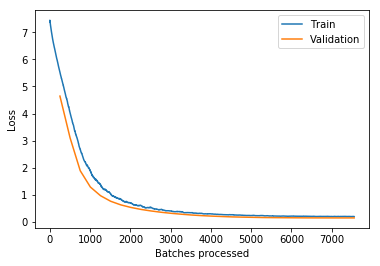

In [14]:
learn.recorder.plot_losses()

In [15]:
learn.predict("patient has kidney", n_words=10)

'patient has kidney disease , identifiersas per these 19 points http : /'

In [16]:
learn.save_encoder('enc')
learn.show_results()

text,target,pred
xxbos xxmaj was about to discharge him as a xxup copd before i saw his xxup cxr fromthe console at,last minute ! frown emoticon a 65 year old man with breathlessness since 4 years andincreased since 2 weeks http,last minute ! frown emoticon a 65 year old man with breathlessness since 4 years andincreased since 2 weeks http
background information ) and then share theirperspectives on further management with the entire class . xxmaj comments welcome on this,"from a medical educationperspective : xxmaj priyank xxmaj jain , xxmaj amy xxmaj price , xxmaj riddhi xxmaj doshi ,","from a medical educationperspective : xxmaj priyank xxmaj jain , xxmaj amy xxmaj price , xxmaj riddhi xxmaj doshi ,"
a hospital in xxmaj delhi : xxbos this is my first post in tabula rasa ... hope this is not,tongue emoticon ! ! ! xxbos find a link among the three xxrep 5 . xxbos xxmaj please check out,tongue emoticon ! ! ! xxbos xxmaj a link among the three xxrep 5 . xxbos xxmaj this vote out
m xxbos a 33 year old man with severe chest pain intermittent since 7years http : / / www.udhc.co.in /,input / displayissuegraphically.jspâ€ ¦ uploaded by our research assistant xxmaj mr xxmaj kuldeep xxmaj gupta for your inputs . xxmaj,input / displayissuegraphically.jspâ€ ¦ uploaded by our research assistant xxmaj mr xxmaj kuldeep xxmaj gupta for your inputs . xxmaj
although he has had a chronic arthritis since the age of 2 ( xxmaj michele)his current problem since 1 month,to be a meningitis . xxbos 24 year old man with arthritis and nephrotic proteinuria andrecurrent urtis and abdominal pain,to be a meningitis . xxbos xxmaj year old man with arthritis and nephrotic proteinuria andrecurrent urtis and abdominal pain


In [17]:
learn = text_classifier_learner(data_clas)
learn.load_encoder('enc')
learn.freeze()
learn.fit_one_cycle(4, moms=moms)

epoch,train_loss,valid_loss,accuracy
1,4.402621,4.147029,0.176958
2,4.270116,3.770566,0.215085
3,4.101539,4.041258,0.243058
4,3.963038,5.338724,0.248446


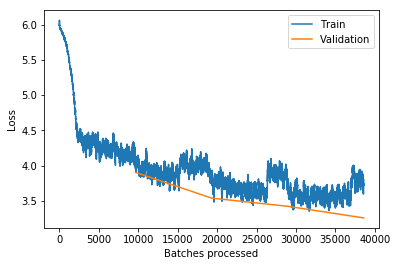

In [36]:
learn.recorder.plot_losses()

In [37]:
learn.unfreeze()
learn.fit_one_cycle(16, slice(1e-5,1e-3), moms=moms)

epoch,train_loss,valid_loss,accuracy
1,3.728496,3.181416,0.298503
2,3.538190,2.990097,0.343418
3,3.227110,2.512537,0.425115
4,3.330220,2.396890,0.444905
5,3.090280,2.225641,0.454437
6,3.048884,1.931262,0.522043
7,2.843514,1.955028,0.518106
8,2.775640,1.885570,0.525929
9,2.716079,1.791973,0.536652
10,2.631191,1.765095,0.551728


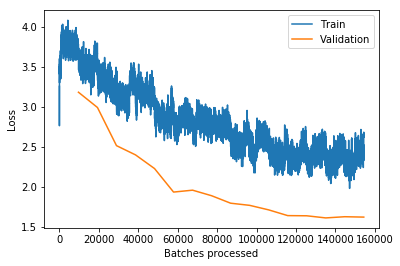

In [38]:
learn.recorder.plot_losses()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-7,1e-5), moms=moms)

epoch,train_loss,valid_loss,accuracy
1,3.876588,3.597566,0.252383
2,3.991416,4.908153,0.254662
3,3.818795,4.591688,0.259221
4,3.990326,3.592179,0.258806
5,3.948789,6.436870,0.254248
6,3.894104,3.579833,0.249275
7,3.866662,5.465014,0.250311
8,4.013185,4.735048,0.258599
9,3.963150,4.452809,0.261915
10,3.991586,4.755138,0.255906


In [ ]:
learn.save_encoder('enc_classifier')
learn.fit_one_cycle(50, slice(1e-5,1e-3), moms=moms)
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy
1,2.476846,1.639792,0.579392
2,2.618904,1.630476,0.583070
3,2.489847,1.646503,0.579547
4,2.539085,1.641020,0.573227
5,2.442715,1.617114,0.579236
6,2.491336,1.630415,0.581516
7,2.391599,1.656808,0.571258
8,2.372171,1.584737,0.572812
9,2.345037,1.664279,0.562348
10,2.468441,1.627768,0.572450


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

In [20]:
learn.save_encoder('enc_classifier')

epoch,train_loss,valid_loss,accuracy
1,2.634516,1.794826,0.552217
2,2.654097,1.783753,0.554496
3,2.511197,1.803771,0.550352
4,2.563529,1.767928,0.550559
5,2.641932,1.790253,0.552217
6,2.733894,1.792964,0.549316
7,2.690071,1.779670,0.552839
8,2.628465,1.761051,0.547244
9,2.781884,1.789964,0.542271
10,2.626339,1.788577,0.546622


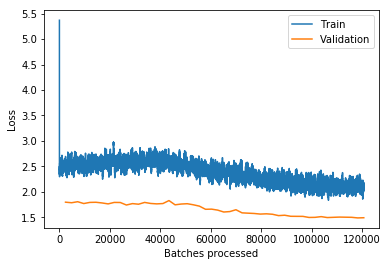

In [21]:
learn.fit_one_cycle(50, slice(1e-5,1e-3), moms=moms)
learn.recorder.plot_losses()

In [13]:
learn = text_classifier_learner(data_clas)
learn.load_encoder('enc_classifier')
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-3,1e-1), moms=moms)
le1arn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy
1,3.683668,6.260392,0.335682
2,4.532176,4.429402,0.171571
3,4.812127,4.729815,0.148156
4,4.907611,1260.391479,0.015541
5,4.817303,4.831378,0.165354
6,5.054336,4.861031,0.165354
7,4.906538,4.660865,0.163904
8,4.935350,4.803379,0.007460
9,4.841048,4.757086,0.165354
10,4.774154,4.659713,0.165354


KeyboardInterrupt: 

In [68]:
data_clas.show_batch()

text,target
"xxbos xxfld 1 a pregnant lady at 37 weeks of gestation presented withyellowish discoloration of sclera and urine for last 3 days . xxmaj onexamination she had jaundice , oedema , xxup bp 160 / 100 mm xxmaj hg , proteinuria 2 + . xxmaj initial bilirubin was 5 mg / dl . xxmaj suddenly within 24hour of admission , she developed severe pain abdomen , vomiting , polyuria .",subhrashis
"xxbos xxfld 1 a pregnant lady at 37 weeks of gestation presented withyellowish discoloration of sclera and urine for last 3 days . xxmaj onexamination she had jaundice , oedema , xxup bp 160 / 100 mm xxmaj hg , proteinuria 2 + . xxmaj initial bilirubin was 5 mg / dl . xxmaj suddenly within 24hour of admission , she developed severe pain abdomen , vomiting , polyuria .",subhrashis
"xxbos xxfld 1 a pregnant lady at 37 weeks of gestation presented withyellowish discoloration of sclera and urine for last 3 days . xxmaj onexamination she had jaundice , oedema , xxup bp 160 / 100 mm xxmaj hg , proteinuria 2 + . xxmaj initial bilirubin was 5 mg / dl . xxmaj suddenly within 24hour of admission , she developed severe pain abdomen , vomiting , polyuria .",kaustav.bera
"xxbos xxfld 1 a pregnant lady at 37 weeks of gestation presented withyellowish discoloration of sclera and urine for last 3 days . xxmaj onexamination she had jaundice , oedema , xxup bp 160 / 100 mm xxmaj hg , proteinuria 2 + . xxmaj initial bilirubin was 5 mg / dl . xxmaj suddenly within 24hour of admission , she developed severe pain abdomen , vomiting , polyuria .",kaustav.bera
"xxbos xxfld 1 xxmaj it is a pleasure to introduce all of you here to the team fromtaipei xxmaj medical xxmaj university , xxmaj taiwan currently in xxmaj bhopal . xxmaj we haveencouraged the students to explore what happens upstream in thehealth information generation process ( that is usually learned bymedical students ) and they shall soon share their progress herein their individual learning portfolios ( aka theirweb - logs",kaustav.bera


In [9]:
learn.predict("it is a pleasure to introduce all of you here to the team from taipei")

(Category abhijit.banerjee.399,
 tensor(14),
 tensor([0.0027, 0.0031, 0.0030, 0.0028, 0.0031, 0.0030, 0.0026, 0.0025, 0.0029,
         0.0027, 0.0025, 0.0028, 0.0030, 0.0025, 0.0033, 0.0028, 0.0032, 0.0026,
         0.0029, 0.0028, 0.0025, 0.0025, 0.0026, 0.0028, 0.0024, 0.0029, 0.0024,
         0.0026, 0.0027, 0.0028, 0.0027, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
         0.0029, 0.0028, 0.0028, 0.0025, 0.0027, 0.0031, 0.0031, 0.0025, 0.0026,
         0.0030, 0.0030, 0.0024, 0.0027, 0.0024, 0.0024, 0.0025, 0.0027, 0.0031,
         0.0032, 0.0029, 0.0031, 0.0028, 0.0028, 0.0029, 0.0030, 0.0028, 0.0031,
         0.0025, 0.0027, 0.0032, 0.0027, 0.0030, 0.0028, 0.0031, 0.0030, 0.0027,
         0.0025, 0.0030, 0.0025, 0.0031, 0.0032, 0.0030, 0.0029, 0.0031, 0.0026,
         0.0025, 0.0028, 0.0026, 0.0029, 0.0027, 0.0031, 0.0029, 0.0026, 0.0026,
         0.0024, 0.0029, 0.0026, 0.0032, 0.0029, 0.0029, 0.0025, 0.0032, 0.0025,
         0.0030, 0.0032, 0.0026, 0.0032, 0.0027, 0.0029, 0.0029,

In [128]:
learn.unfreeze()

In [129]:
learn.fit(lrs, 1, wds=wd, cycle_len=14, use_clr=(32,10))

epoch      trn_loss   val_loss   accuracy                   
    0      3.218195   3.358307   0.302222  
    1      3.084086   3.219394   0.331448                   
    2      2.686148   3.079586   0.374834                   
    3      2.42546    3.048664   0.386202                   
    4      2.209717   3.081404   0.401361                   
    5      1.959353   3.030078   0.40772                    
    6      1.781827   3.120869   0.414947                   
    7      1.549243   3.125763   0.42249                    
    8      1.455891   3.123033   0.425891                   
    9      1.276168   3.181194   0.448499                   
    10     1.104      3.227175   0.462955                   
    11     1.096317   3.252309   0.459979                    
    12     0.903639   3.262227   0.461365                    
    13     0.868612   3.355602   0.459757                    


[array([3.3556]), 0.45975672921038563]

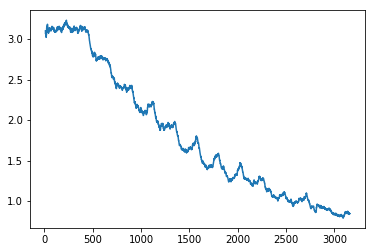

In [130]:
learn.sched.plot_loss()

In [1]:
learn.save('clas_2')

NameError: name 'learn' is not defined

# Fin

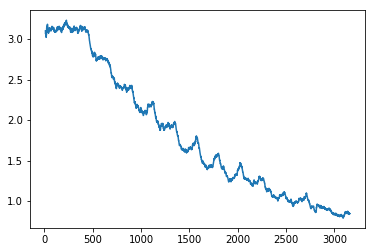

In [132]:
learn.sched.plot_loss()